# **PROBLEM STATEMENT**

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# **FEATURES:**

Date - The date of the observation

type - Conventional or Organic

year - year

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

# **Target:**
The problem statement can been analysed as two different problems such as Regression and Classification problems.

For regression target :

Average Price - The Average price of a single avocado

For Classification target:

Region - the city or region of the observation

# **Here we go with classification problem**


In [ ]:
#Importing Necessary Libraries
import numpy as np #numerical python
import pandas as pd #Data manipulation and analysis
import sklearn #Machine learning library

from sklearn.preprocessing import LabelEncoder#encoding
from sklearn.preprocessing import StandardScaler#standardizing
from sklearn.model_selection import train_test_split#spliting the data into training and testing
from sklearn.linear_model import LogisticRegression#regression
from sklearn.ensemble import RandomForestClassifier#classification
from sklearn.tree import DecisionTreeClassifier#classification
from statsmodels.stats.outliers_influence import variance_inflation_factor#checking vif
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score#model evaluation metrics
from sklearn.linear_model import Lasso, LassoCV, Ridge,  RidgeCV #for linear model cv
from sklearn.model_selection import cross_val_score#cross validation
from sklearn.model_selection import GridSearchCV#hyper parameter tunning
from sklearn.model_selection import KFold#cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV#for hyperparameter tunning
from sklearn.metrics import roc_curve,roc_auc_score#model evaluation
from sklearn.metrics import RocCurveDisplay#model evaluation
import pickle#saving the model


#Data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Data science /avocado.csv')

In [ ]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


From the observation of the dataset some features need to be dropped

Need to rename the Product Lookup codes to correct feature names as identifiable.

# **EDA**

In [ ]:
# Shape of the dataset
df.shape



(18249, 14)

In [ ]:
#checking the columns in the dataframe
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [ ]:
# Check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
# Check Dataset summary
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
Date,object
AveragePrice,float64
Total Volume,float64
4046,float64
4225,float64
4770,float64
Total Bags,float64
Small Bags,float64
Large Bags,float64


In [ ]:
#object datatypes are found

In [ ]:
#Lets check if there duplicates in our dataset
df.duplicated().sum()

0

In [ ]:
#summary statistics
# Get basic statistics of numerical features
print(df.describe())

# Get basic statistics of categorical features
print(df.describe(include=["O"]))

         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05 

In [ ]:
#checking for null values
df.isnull().sum()

,0
Unnamed: 0,0
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0


# **DATA SET OVERVIEW**

*The dataset contains 18249 rows and 13 columns

*The target variable for regression is average price of a single avocado

*the target variable for classification is city or region of observation

*There are no duplicates in the dataset

*There are no null-values in the given dataset

*D-types are object type, integer type and float

# **DATA** **VISUALISATION**

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [ ]:
# Set style for plots
sns.set_theme(style="whitegrid")

# **Distribution of Average Price**

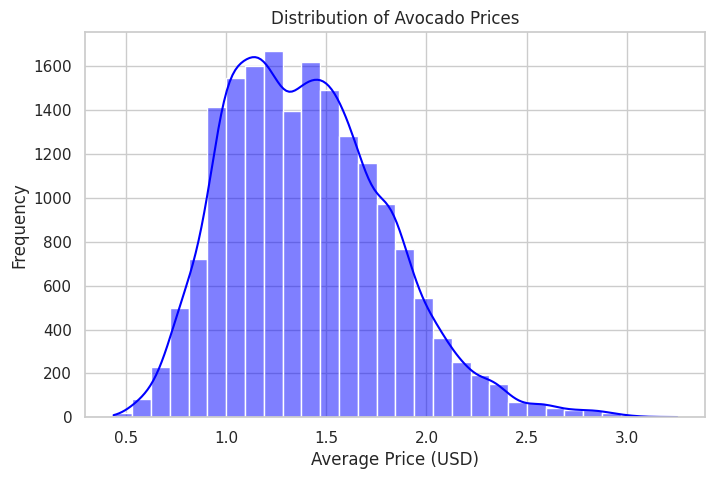

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["AveragePrice"], bins=30, kde=True, color="blue")
plt.title("Distribution of Avocado Prices")
plt.xlabel("Average Price (USD)")
plt.ylabel("Frequency")
plt.show()

# **Distribution of Total Volume Sold**

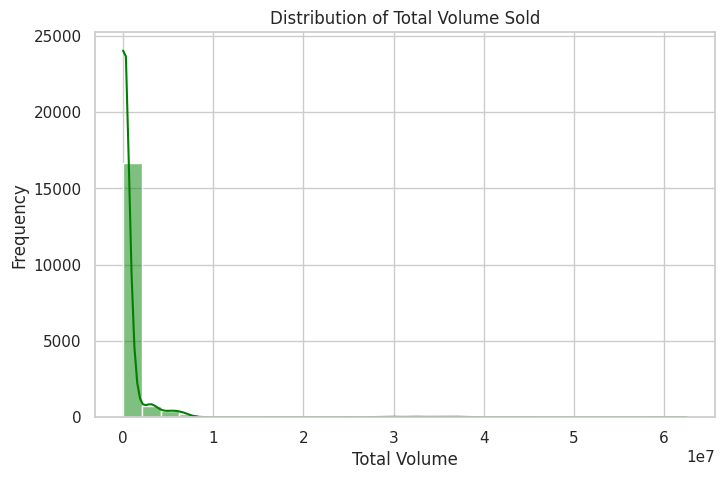

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Total Volume"], bins=30, kde=True, color="green")
plt.title("Distribution of Total Volume Sold")
plt.xlabel("Total Volume")
plt.ylabel("Frequency")
plt.show()


# **Distribution of Avocado Types**

<ipython-input-17-9f495c9ac9d6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="coolwarm")


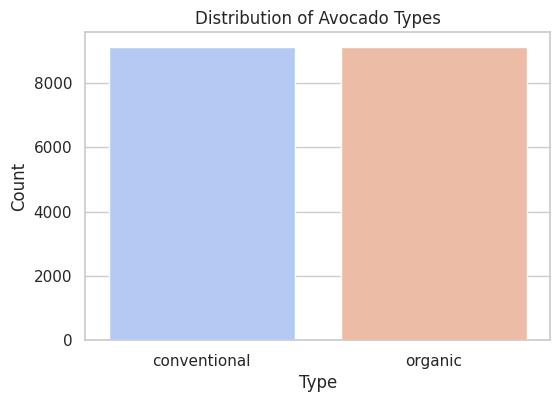

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="type", palette="coolwarm")
plt.title("Distribution of Avocado Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# **Yearly Distribution of Data Points**


<ipython-input-18-1ecf0cd5fb8e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="year", palette="viridis")


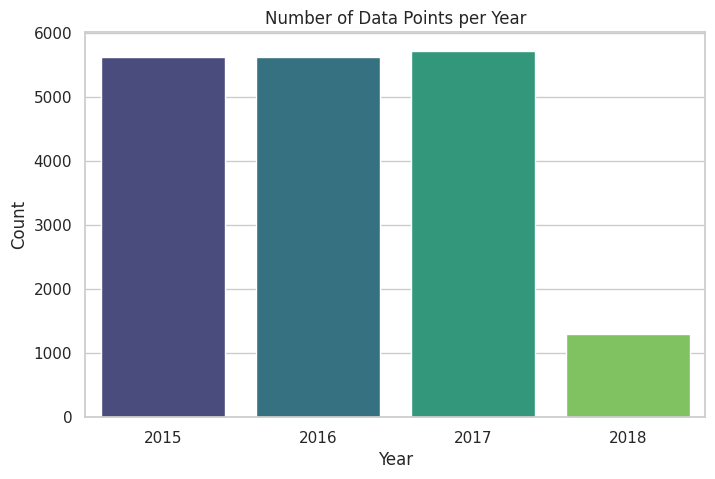

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="year", palette="viridis")
plt.title("Number of Data Points per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

conclusions from the above visualizations:

✅ Sales volume is skewed, indicating occasional spikes in demand.

✅ Conventional avocados are more popular, likely due to lower prices.

✅ The dataset is well-distributed across years, allowing for trend analysis

# **Univariate Analysis (Feature Distributions)**

# **Small Bags Sold**

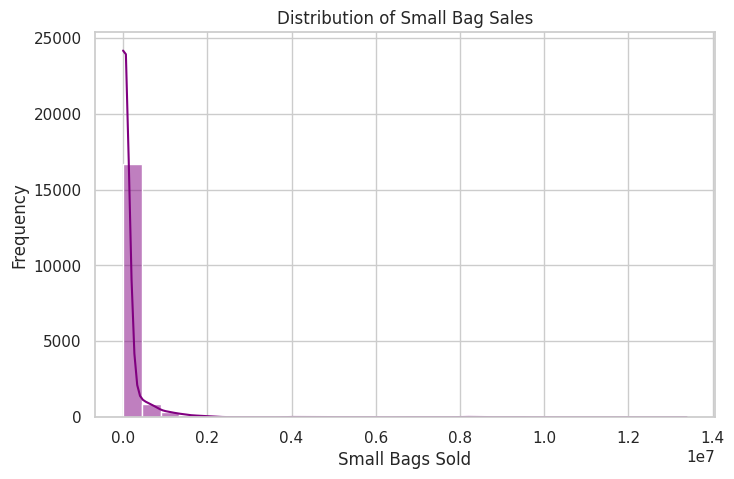

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Small Bags"], bins=30, kde=True, color="purple")
plt.title("Distribution of Small Bag Sales")
plt.xlabel("Small Bags Sold")
plt.ylabel("Frequency")
plt.show()

The majority of transactions involve low-to-moderate numbers of small bags sold.

A few data points suggest very high sales, possibly bulk purchases by stores or seasonal demand spikes.

# **Bag Sales (Total Bags, Small Bags, Large Bags, XLarge Bags)**

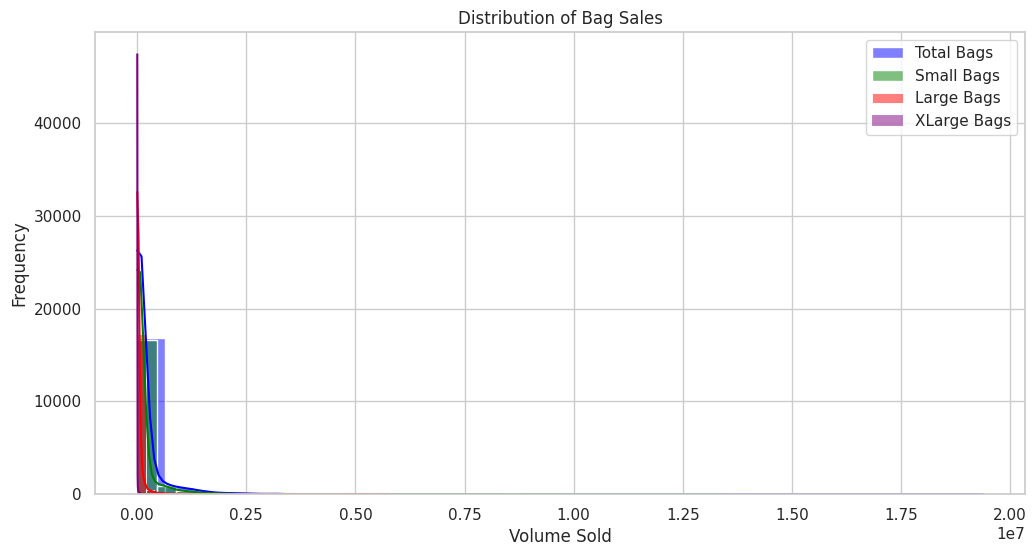

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Total Bags"], bins=30, kde=True, color="blue", label="Total Bags")
sns.histplot(df["Small Bags"], bins=30, kde=True, color="green", label="Small Bags")
sns.histplot(df["Large Bags"], bins=30, kde=True, color="red", label="Large Bags")
sns.histplot(df["XLarge Bags"], bins=30, kde=True, color="purple", label="XLarge Bags")
plt.title("Distribution of Bag Sales")
plt.xlabel("Volume Sold")
plt.ylabel("Frequency")
plt.legend()
plt.show()

The distribution of bag sales shows varying volume across different categories, with small bags often dominating sales.

# **Yearly Sales Trend**

<ipython-input-21-d45023fcfd4e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="year", palette="magma")


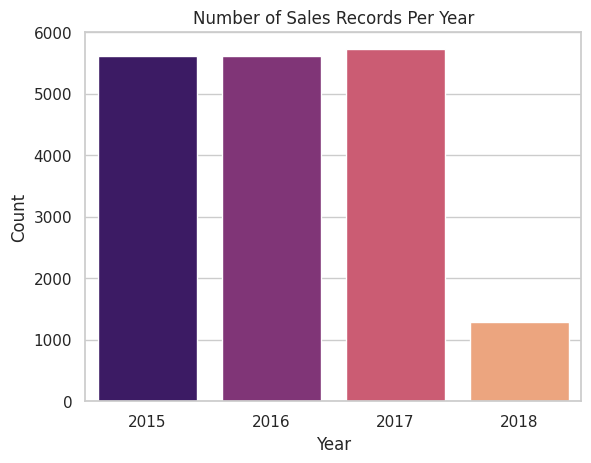

In [ ]:
sns.countplot(data=df, x="year", palette="magma")
plt.title("Number of Sales Records Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

The dataset is well-distributed across different years.

Could be useful for time-series analysis to detect long-term avocado market trends.

# **Bivariate Analysis (region vs Features)**

# **Avocado Type Distribution Across Regions**

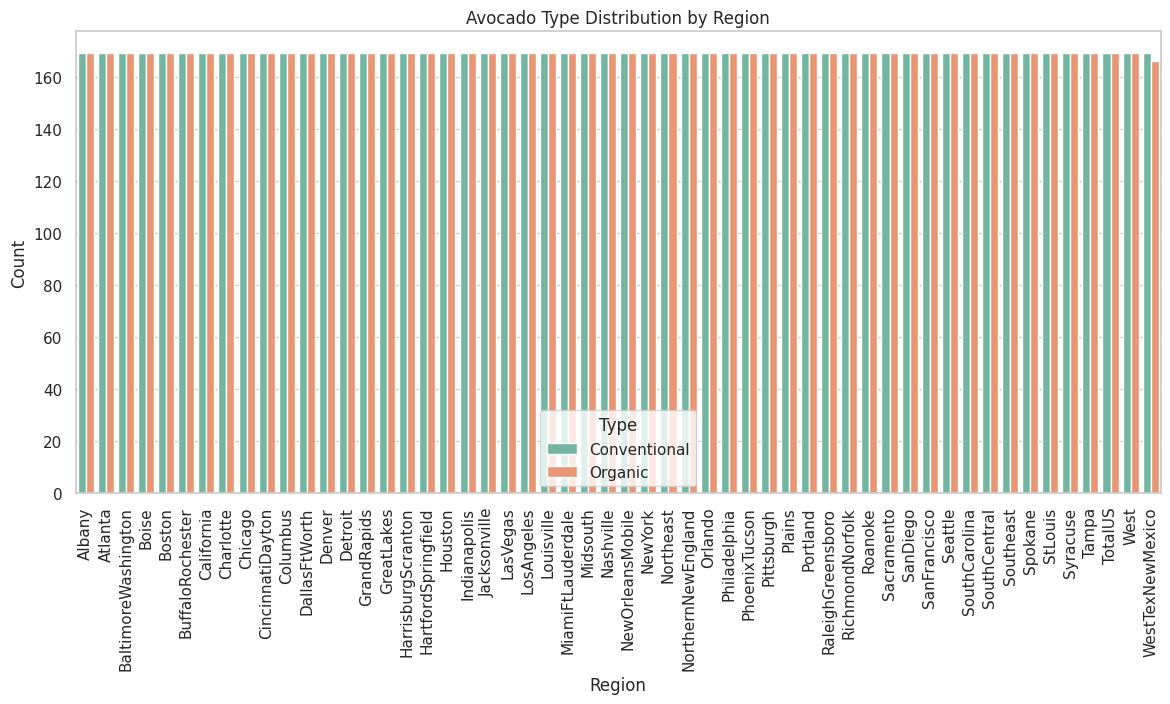

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x="region", hue="type", palette="Set2")
plt.xticks(rotation=90)
plt.title("Avocado Type Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title="Type", labels=["Conventional", "Organic"])
plt.show()

Some regions sell more organic avocados, while others primarily sell conventional avocados.

Organic avocados may be more popular in certain high-income or health-conscious areas.

# **Bag Sales vs. Region**

<Figure size 1400x600 with 0 Axes>

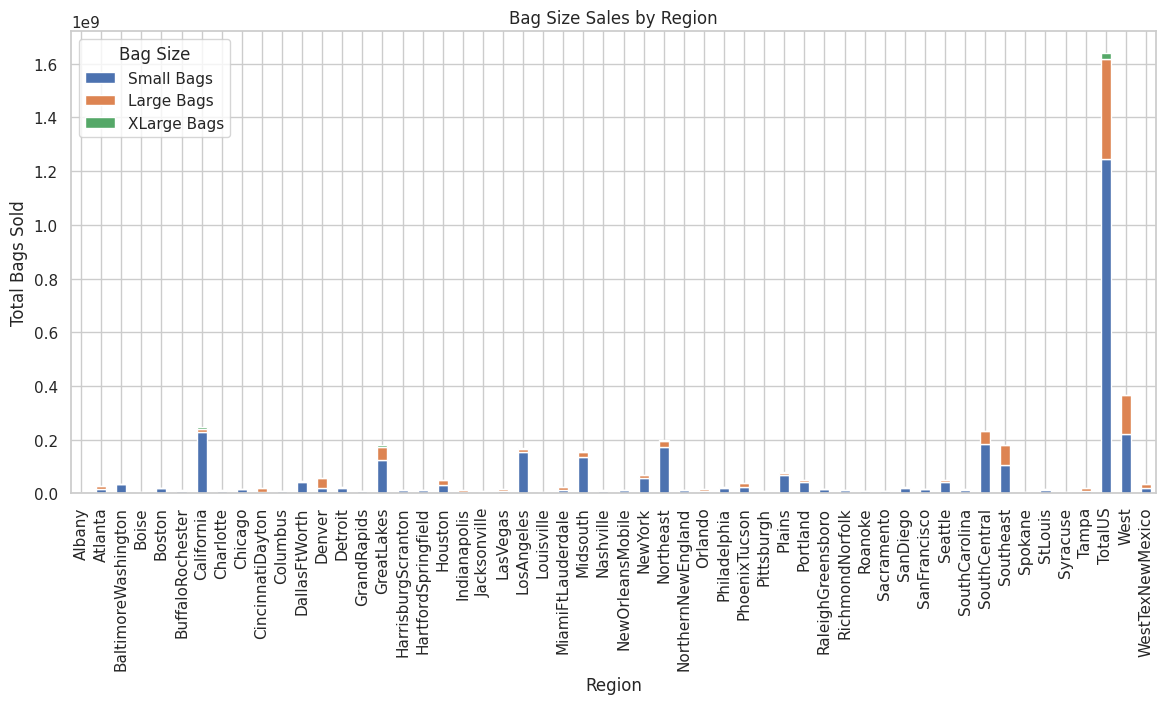

In [ ]:
plt.figure(figsize=(14, 6))
df.groupby("region")[["Small Bags", "Large Bags", "XLarge Bags"]].sum().plot(kind="bar", stacked=True, figsize=(14, 6))
plt.title("Bag Size Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Bags Sold")
plt.xticks(rotation=90)
plt.legend(title="Bag Size")
plt.show()

Small bags dominate sales in most regions, likely due to household purchases.

Some regions prefer larger bags, possibly due to wholesale purchases or bulk buying habits.


# **Average Price vs. Region**

<ipython-input-24-61215de957f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="region", y="AveragePrice", palette="coolwarm")


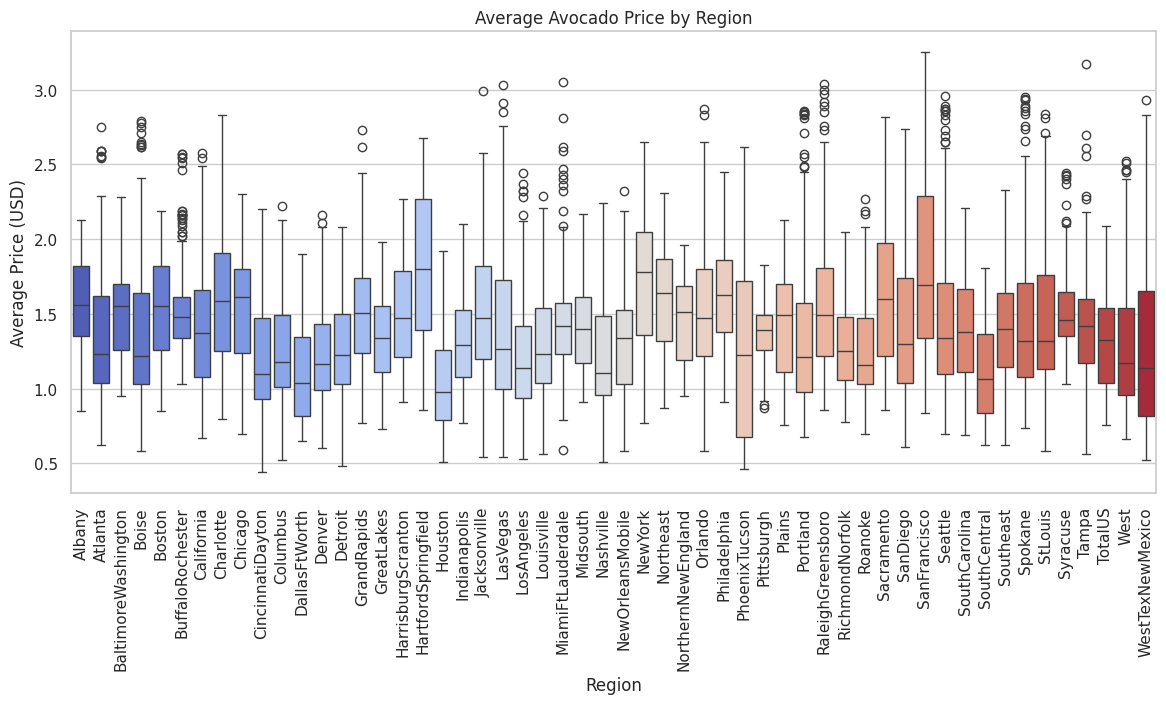

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="region", y="AveragePrice", palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Average Avocado Price by Region")
plt.xlabel("Region")
plt.ylabel("Average Price (USD)")
plt.show()

Some regions have significantly higher prices, possibly due to supply chain costs or organic avocado demand.

Price variations exist, indicating different consumer behavior or availability in different markets.

# **DATA PREPROCESSING**

In [ ]:
# Lets drop the features that is unimportant for the analysis
df.drop(columns=["Unnamed: 0","Date"], inplace=True)

In [ ]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
# Lets treat missing values count of by value_counts of features
df['4046'].value_counts()

,count
4046,
0.00,242
3.00,10
4.00,8
1.24,8
1.00,8
...,...
1486.31,1
1761.80,1
1772.26,1


In [ ]:
df['4046'].mean()

293008.4245306592

Since there are 242 values of 0.00 lets replace them with mean values

In [ ]:
df['4046'].replace(to_replace=0.00,value=df['4046'].mean(),inplace=True)

<ipython-input-30-f99cdba34c58>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['4046'].replace(to_replace=0.00,value=df['4046'].mean(),inplace=True)


In [ ]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.968940e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264533e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,9.750900e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,9.954770e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.217699e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
# Lets treat missing value of 4225 feature
df['4225'].value_counts()

,count
4225,
0.00,61
177.87,3
215.36,3
1.30,3
1.26,3
...,...
417905.67,1
275986.91,1
277789.30,1


In [ ]:
df['4225'].mean()

295154.56835607433

In [ ]:
df['4225'].replace(to_replace=0.00,value=df['4225'].mean(),inplace=True)

<ipython-input-34-e775aa27c6a8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['4225'].replace(to_replace=0.00,value=df['4225'].mean(),inplace=True)


In [ ]:
df['4225'].value_counts()

,count
4225,
295154.568356,61
177.870000,3
215.360000,3
1.300000,3
1.260000,3
...,...
417905.670000,1
275986.910000,1
277789.300000,1


In [ ]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.968940e+05,2.961412e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264533e+06,1.203999e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,1.000000e+00,1.260000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,9.750900e+02,3.086950e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,9.954770e+03,2.977364e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.217699e+05,1.542584e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
# Lets treat 4770 feature missing values to replace with missing values
df['4770'].value_counts()

,count
4770,
0.00,5497
2.66,7
3.32,7
10.97,6
1.59,6
...,...
547.08,1
155.87,1
72.01,1


In [ ]:
df['4770'].mean()

22839.73599265713

In [ ]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.968940e+05,2.961412e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264533e+06,1.203999e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,1.000000e+00,1.260000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,9.750900e+02,3.086950e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,9.954770e+03,2.977364e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.217699e+05,1.542584e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
#Lets treat Total Bags, Small Bags, Large Bags, XLarge Bags missing values with mean values
print(df['Total Bags'].value_counts())
print(df['Small Bags'].value_counts())
print(df['Large Bags'].value_counts())
print(df['XLarge Bags'].value_counts())

Total Bags
0.00         15
990.00        5
300.00        5
550.00        4
266.67        4
             ..
90196.05      1
130858.02     1
510679.10     1
84522.00      1
12014.15      1
Name: count, Length: 18097, dtype: int64
Small Bags
0.00        159
203.33       11
223.33       10
533.33       10
123.33        8
           ... 
14002.00      1
32441.00      1
29560.96      1
22077.20      1
11988.14      1
Name: count, Length: 17321, dtype: int64
Large Bags
0.00          2370
3.33           187
6.67            78
10.00           47
4.44            38
              ... 
2528089.14       1
2287449.76       1
731388.25        1
673464.14        1
26.01            1
Name: count, Length: 15082, dtype: int64
XLarge Bags
0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: count, Length: 5588, dtype: int64


In [ ]:
print(f'Total Bags mean:', df['Total Bags'].mean())
print(f'Small Bags mean:',df['Small Bags'].mean())
print(f'Large Bags mean:',df['Large Bags'].mean())
print(f'XLarge Bags mean:',df['XLarge Bags'].mean())

Total Bags mean: 239639.20205983886
Small Bags mean: 182194.68669570936
Large Bags mean: 54338.08814455587
XLarge Bags mean: 3106.426507205874


In [ ]:
df['Total Bags'].replace(to_replace=0.00,value=df['Total Bags'].mean(),inplace=True)
df['Small Bags'].replace(to_replace=0.00,value=df['Small Bags'].mean(),inplace=True)
df['Large Bags'].replace(to_replace=0.00,value=df['Large Bags'].mean(),inplace=True)
df['XLarge Bags'].replace(to_replace=0.00,value=df['XLarge Bags'].mean(),inplace=True)

<ipython-input-42-de39ad0d7bc8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Bags'].replace(to_replace=0.00,value=df['Total Bags'].mean(),inplace=True)
<ipython-input-42-de39ad0d7bc8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [ ]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.968940e+05,2.961412e+05,2.283974e+04,2.398362e+05,1.837821e+05,6.139498e+04,5157.291024,2016.147899
std,0.402677,3.453545e+06,1.264533e+06,1.203999e+06,1.074641e+05,9.862184e+05,7.459830e+05,2.430763e+05,17391.406970,0.939938
min,0.440000,8.456000e+01,1.000000e+00,1.260000e+00,0.000000e+00,3.090000e+00,2.520000e+00,9.700000e-01,1.000000,2015.000000
25%,1.100000,1.083858e+04,9.750900e+02,3.086950e+03,0.000000e+00,5.108010e+03,3.125050e+03,9.187500e+02,3106.426507,2015.000000
50%,1.370000,1.073768e+05,9.954770e+03,2.977364e+04,1.849900e+02,3.992521e+04,2.787623e+04,7.942080e+03,3106.426507,2016.000000
75%,1.660000,4.329623e+05,1.217699e+05,1.542584e+05,6.243420e+03,1.112384e+05,8.620928e+04,5.433809e+04,3106.426507,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
# Lets rename the columns of PLU code
df.rename(columns ={'Total Volume':'Total_Volume','4046':'PLU_4046_avcd', '4225':'PLU_4225_avcd', '4770':'PLU_4770_avcd','Total Bags':'Total_Bags','Small Bags':'Small_Bags','Large Bags':'Large_Bags','XLarge Bags':'XLarge_Bags'},inplace=True)
df.head()

,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,conventional,2015,Albany


In [ ]:
df.region.value_counts()

,count
region,
Albany,338
Sacramento,338
Northeast,338
NorthernNewEngland,338
Orlando,338
Philadelphia,338
PhoenixTucson,338
Pittsburgh,338
Plains,338


# **LABEL ENCODING**

In [ ]:
# Label encode the categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit and transform the 'type' column
df['type'] = le.fit_transform(df['type'])

# Fit and transform the 'region' column
df['region'] = le.fit_transform(df['region'])

df.head()

,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0


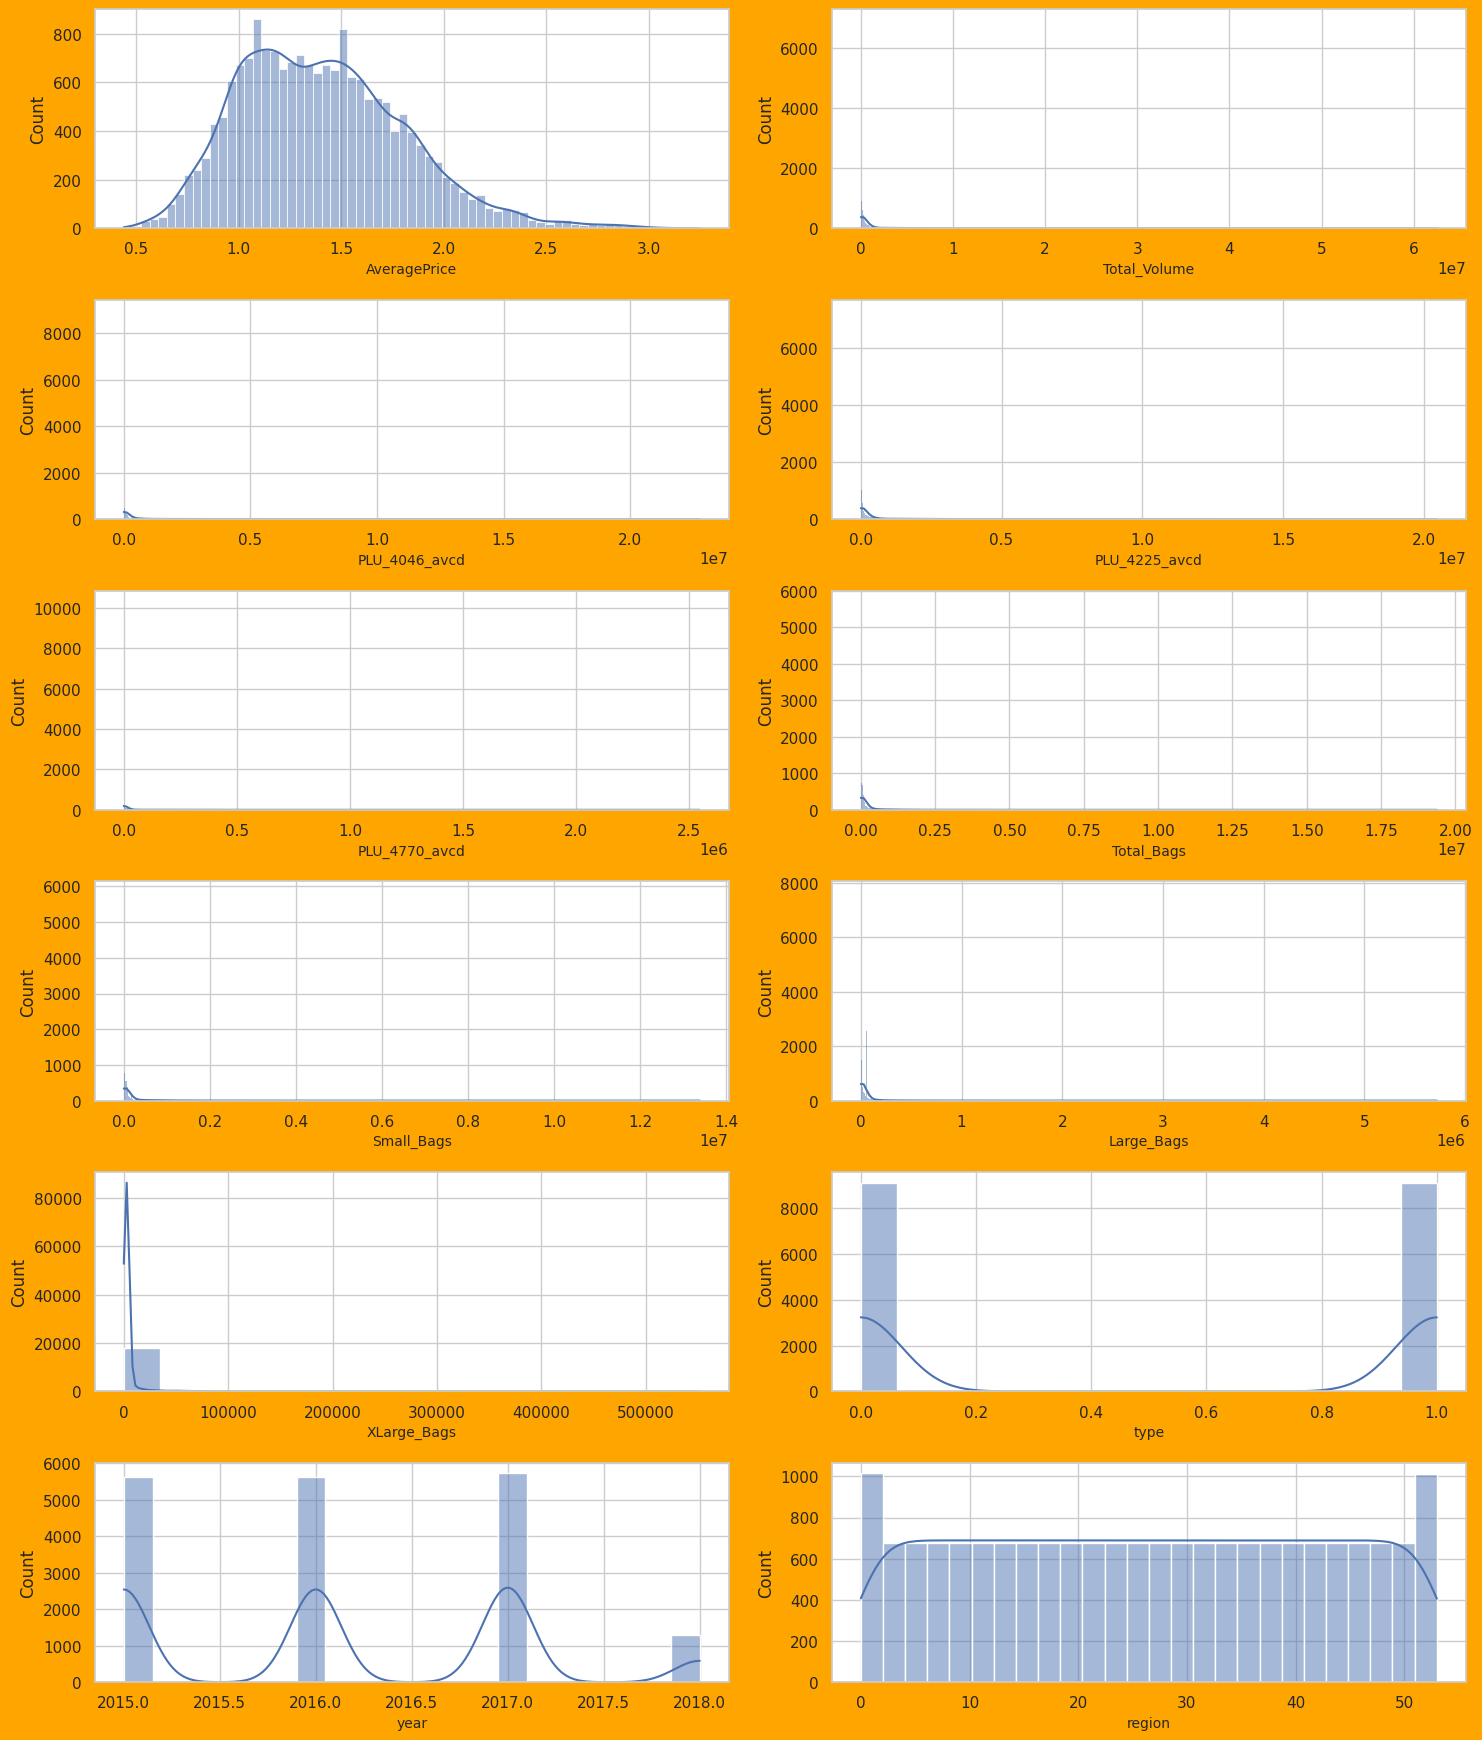

In [ ]:
plt.figure(figsize=(15,20),facecolor='orange')
plotnumber=1
for column in df:
  if plotnumber<=13:
        ax=plt.subplot(7,2,plotnumber)
        sns.histplot(df[column], kde=True)
        plt.xlabel(column,fontsize=10)
  plotnumber+=1
plt.tight_layout()
plt.show()

# **CHECKING FOR OUTLIERS**

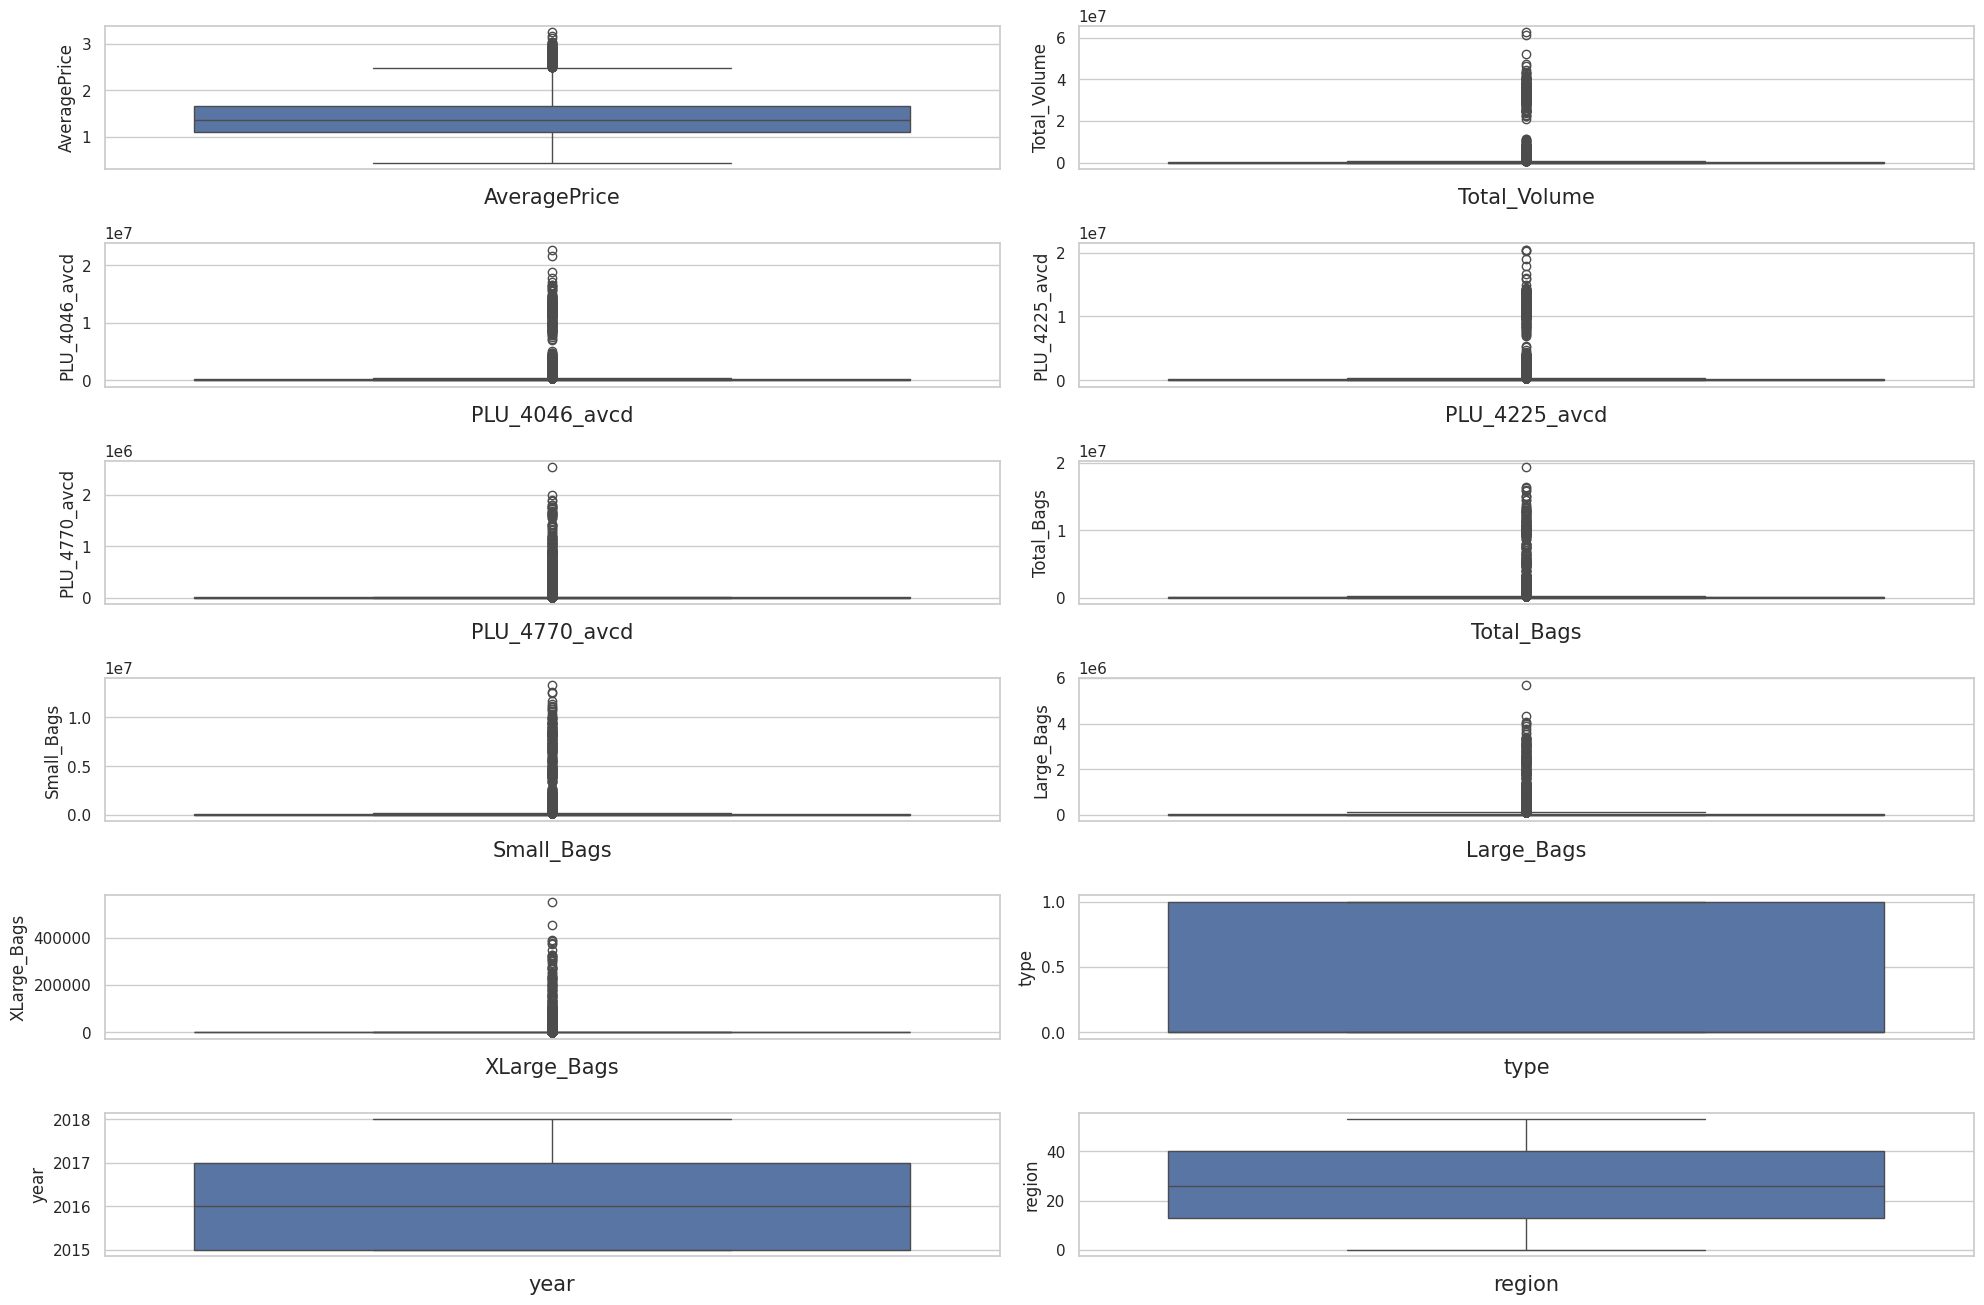

In [ ]:
#Visualize the outliers using boxplot
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber <=13:
        plt.subplot(7,2,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.tight_layout()

In [ ]:
# Lets treat Outliers
#1st quantile
q1=df.quantile(0.25)

In [ ]:
#3rd quantile
q3=df.quantile(0.75)

In [ ]:
#IQR
IQR =q3  - q1

In [ ]:
print(q1)
print(q3)
print(IQR)

AveragePrice         1.100000
Total_Volume     10838.580000
PLU_4046_avcd      975.090000
PLU_4225_avcd     3086.950000
PLU_4770_avcd        0.000000
Total_Bags        5108.010000
Small_Bags        3125.050000
Large_Bags         918.750000
XLarge_Bags       3106.426507
type                 0.000000
year              2015.000000
region              13.000000
Name: 0.25, dtype: float64
AveragePrice          1.660000
Total_Volume     432962.290000
PLU_4046_avcd    121769.890000
PLU_4225_avcd    154258.390000
PLU_4770_avcd      6243.420000
Total_Bags       111238.440000
Small_Bags        86209.280000
Large_Bags        54338.088145
XLarge_Bags        3106.426507
type                  1.000000
year               2017.000000
region               40.000000
Name: 0.75, dtype: float64
AveragePrice          0.560000
Total_Volume     422123.710000
PLU_4046_avcd    120794.800000
PLU_4225_avcd    151171.440000
PLU_4770_avcd      6243.420000
Total_Bags       106130.430000
Small_Bags        83084.2300

In [ ]:
#Validating Total Volume Outlier
pred_high = (q3.Total_Volume + (1.5 * IQR.Total_Volume))
pred_high

1066147.855

In [ ]:
#Check the indexes which have higher values
index=np.where(df['Total_Volume']>pred_high)
index

(array([  312,   313,   314, ..., 18222, 18223, 18224]),)

In [ ]:
df=df.drop(df.index[index])

In [ ]:
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15947,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53
15948,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53
15949,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53
15950,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [ ]:
#Validating PLU_4046_avcd Outlier
pred_high = (q3.PLU_4046_avcd + (1.5 * IQR.PLU_4046_avcd))
pred_high

302962.09

In [ ]:
#Check the indexes which have higher values
index=np.where(df['PLU_4046_avcd']>pred_high)
index

(array([  54,   66,   68,   71,   72,   73,   74,   75,   76,   77,   78,
          79,   80,   81,   82,   83,   84,   85,   86,   87,   88,   89,
          90,   91,   92,   93,   94,   95,   96,   97,   98,   99,  100,
         101,  102,  103,  519,  520,  521,  522,  523,  524,  525,  526,
         527,  528,  529,  530,  531,  792,  793,  794,  795,  796,  797,
         798,  799,  800,  801,  802,  803,  804,  805,  806,  807,  808,
         809,  810,  811,  812,  813,  814,  815,  816,  817,  818,  819,
         820,  821,  822,  823, 1032, 1034, 1036, 1037, 1040, 1043, 1044,
        1046, 1048, 1052, 1055, 1057, 1059, 1061, 1063, 1064, 1065, 1066,
        1067, 1068, 1069, 1070, 1072, 1075, 1079, 1083, 1279, 1292, 1349,
        1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360,
        1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371,
        1709, 1711, 1712, 1713, 1714, 1717, 1718, 1726, 1727, 1729, 1731,
        1734, 2077, 2080, 2083, 2086, 

In [ ]:
df=df.drop(df.index[index])

In [ ]:
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15421,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53
15422,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53
15423,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53
15424,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [ ]:
#Validating PLU_4046_avcd Outlier
pred_high = (q3.PLU_4046_avcd + (1.5 * IQR.PLU_4046_avcd))
pred_high

302962.09

In [ ]:
#Check the indexes which have higher values
index=np.where(df['PLU_4046_avcd']>pred_high)
index

(array([], dtype=int64),)

In [ ]:
df=df.drop(df.index[index])

In [ ]:
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15421,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53
15422,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53
15423,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53
15424,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [ ]:
#Validating PLU_4225_avcd Outlier
pred_high = (q3.PLU_4225_avcd + (1.5 * IQR.PLU_4225_avcd))
pred_high

381015.55000000005

In [ ]:
#Check the indexes which have higher values
index=np.where(df['PLU_4225_avcd']>pred_high)
index

(array([   68,    69,    70,    71,    73,    74,    75,    76,    77,
           78,    79,    80,    81,    82,    83,    84,    85,    86,
           87,    88,    89,    90,    91,    92,    93,    94,    95,
           96,    97,    98,    99,   100,   101,   102,   103,   104,
          105,   106,   107,   108,   109,   111,   112,   114,   115,
          116,   117,   118,   119,   173,   174,   175,   177,   178,
          179,   180,   181,   182,   184,   185,   186,   187,   188,
          189,   190,   191,   192,   193,   194,   195,   196,   197,
          198,   199,   200,   201,   202,   203,   205,   206,   208,
          215,   218,   223,   328,   329,   330,   331,   332,   333,
          334,   335,   336,   337,   338,   339,   340,   341,   342,
          343,   344,   345,   346,   347,   348,   349,   350,   351,
          352,   353,   354,   355,   356,   357,   358,   359,   360,
          361,   362,   363,   364,   365,   366,   367,   368,   369,
      

In [ ]:
df=df.drop(df.index[index])


In [ ]:
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14819,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53
14820,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53
14821,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53
14822,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [ ]:
#Validating PLU_4770_avcd Outlier
pred_high = (q3.PLU_4770_avcd + (1.5 * IQR.PLU_4770_avcd))
pred_high

15608.550000000001

In [ ]:
#Check the indexes which have higher values
index=np.where(df['PLU_4770_avcd']>pred_high)
index

(array([   68,    69,    70,   192,   193,   194,   195,   196,   197,
          198,   199,   200,   201,   202,   203,   204,   205,   206,
          207,   208,   209,   210,   211,   212,   213,   214,   215,
          216,   217,   218,   219,   220,   221,   222,   223,   224,
          225,   226,   227,   228,   229,   230,   231,   232,   233,
          234,   235,   236,   237,   238,   239,   240,   241,   242,
          243,   251,   258,   259,   263,   284,   287,   291,   297,
          299,   300,   301,   303,   304,   305,   306,   307,   308,
          309,   310,   311,   312,   313,   314,   315,   316,   317,
          319,   320,   321,   323,   324,   325,   328,   330,   331,
          332,   336,   339,   343,   348,   349,   350,   353,   355,
          356,   357,   358,   359,   360,   361,   362,   363,   366,
          367,   368,   369,   370,   371,   372,   373,   374,   375,
          376,   377,   378,   379,   380,   381,   382,   383,   384,
      

In [ ]:
df=df.drop(df.index[index])

In [ ]:
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53
13836,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53
13837,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53
13838,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [ ]:
#Validating Total_Bags Outlier
pred_high = (q3.Total_Bags + (1.5 * IQR.Total_Bags))
pred_high

270434.085

In [ ]:
#Check the indexes which have higher values
index=np.where(df['Total_Bags']>pred_high)
index

(array([  254,   922,  1104,  1107,  1452,  1453,  1454,  1674,  1675,
         1676,  1677,  1679,  1680,  1681,  1682,  1684,  1685,  1686,
         1687,  1688,  2043,  2295,  2348,  2349,  2350,  2351,  2356,
         2357,  2358,  2359,  2360,  2361,  2362,  2363,  2364,  2365,
         2366,  2529,  2530,  2536,  2537,  2538,  2539,  2540,  2541,
         2542,  2543,  2544,  2545,  2546,  2547,  2548,  2549,  2550,
         2551,  2552,  2553,  2554,  2555,  2556,  2557,  2558,  2559,
         2560,  2561,  2562,  2563,  2564,  2565,  2566,  2567,  2568,
         2569,  2570,  2571,  2572,  2573,  2574,  2575,  2576,  2577,
         2921,  3130,  3135,  3207,  3208,  3209,  3210,  3211,  3213,
         3214,  3215,  3216,  3223,  3224,  3225,  3226,  3227,  3229,
         3230,  3231,  3232,  3233,  3234,  3235,  3236,  3891,  3894,
         3895,  3904,  3909,  3910,  3911,  3912,  4152,  4166,  4173,
         4174,  4175,  4176,  4177,  4178,  4179,  4180,  4181,  4182,
      

In [ ]:
df=df.drop(df.index[index])

In [ ]:
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13613,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53
13614,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53
13615,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53
13616,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [ ]:
#Validating Small_Bags Outlier
pred_high = (q3.Small_Bags + (1.5 * IQR.Small_Bags))
pred_high

210835.625

In [ ]:
#Check the indexes which have higher values
index=np.where(df['Small_Bags']>pred_high)
index

(array([ 1108,  1525,  2263,  2326,  2327,  2328,  2490,  2491,  2492,
         2493,  2494,  2495,  2619,  3140,  3143,  4012,  4041,  4355,
         4528, 11727, 11728, 11729, 11730, 11732, 13295, 13338]),)

In [ ]:
df=df.drop(df.index[index])

In [ ]:
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53
13588,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53
13589,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53
13590,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [ ]:
#Validating Large_Bags Outlier
pred_high = (q3.Large_Bags + (1.5 * IQR.Large_Bags))
pred_high

134467.09536138969

In [ ]:
#Check the indexes which have higher values
index=np.where(df['Large_Bags']>pred_high)
index

(array([  255,  1445,  1446,  1447,  1590,  1592,  1593,  1598,  1599,
         1601,  1602,  1604,  1665,  2018,  2019,  2027,  2214,  3010,
         3013,  3014,  3024,  3025,  3026,  3032,  3033,  3035,  3036,
         3037,  3038,  3041,  3043,  3045,  3046,  3047,  3048,  3049,
         3050,  3051,  3052,  3053,  3054,  3056,  3110,  3111,  3112,
         3113,  3114,  3115,  3117,  3381,  3382,  3384,  3385,  3394,
         3395,  3398,  3399,  3601,  4295,  4298,  7263, 10061, 10099,
        10100, 10101, 10104, 10109, 10986, 11000, 11001, 12863, 12890,
        12891, 12899, 12907, 13571, 13575]),)

In [ ]:
df=df.drop(df.index[index])

In [ ]:
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13510,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53
13511,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53
13512,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53
13513,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53


<ipython-input-85-cf82bc868ad8>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='orange')
<ipython-input-85-cf82bc868ad8>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='orange')
<ipython-input-85-cf82bc868ad8>:7: UserWarning: 

`distplot` is a deprecated fun

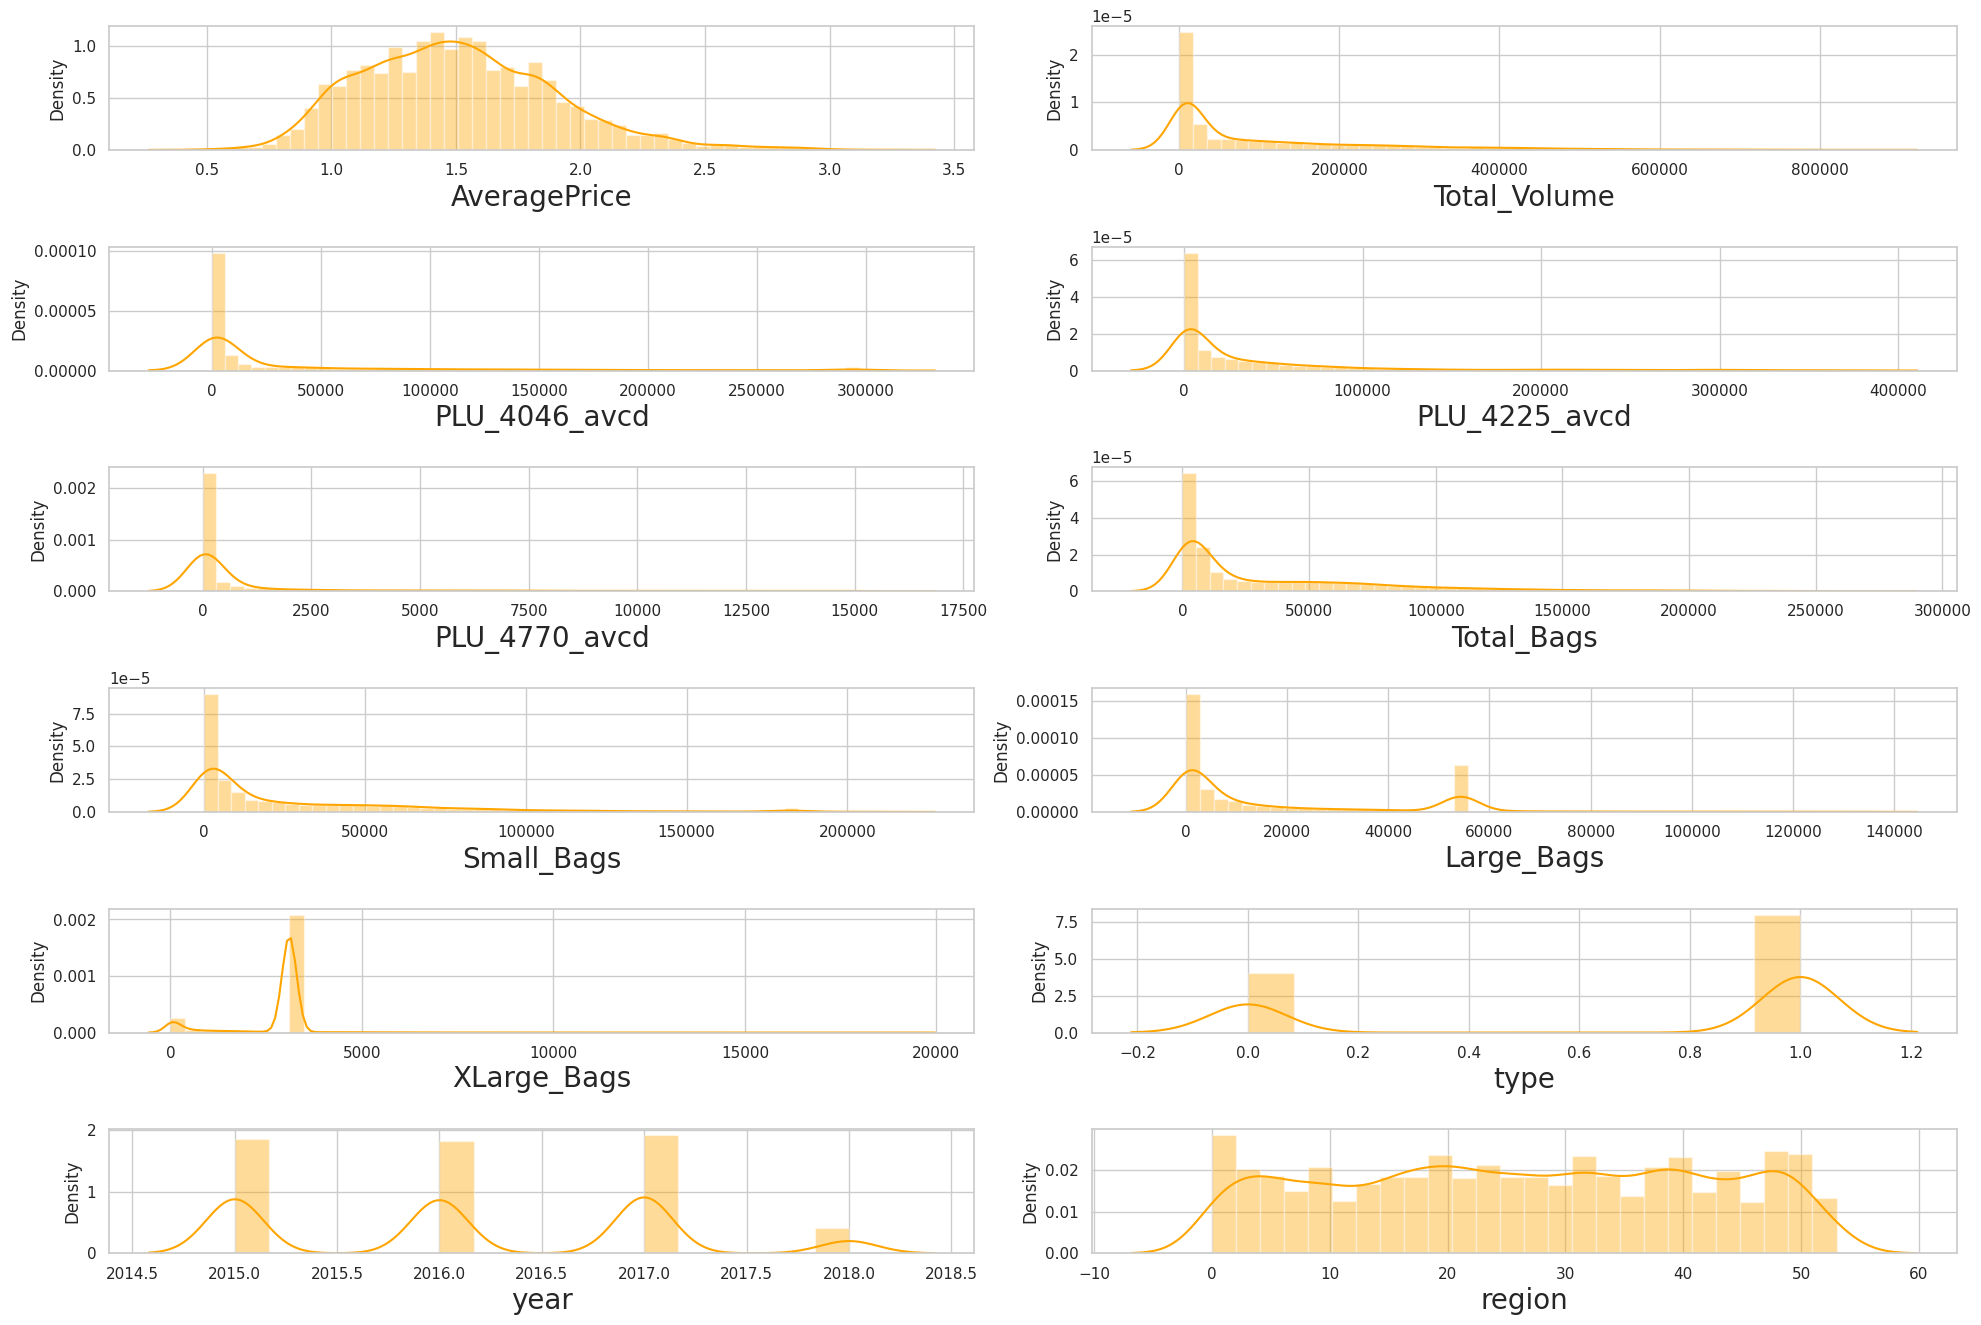

In [ ]:
# After treating outliers plotting the distribution
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df :
    if plotnumber <=13:
        ax=plt.subplot(7,2,plotnumber)
        sns.distplot(df[column],color='orange')
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

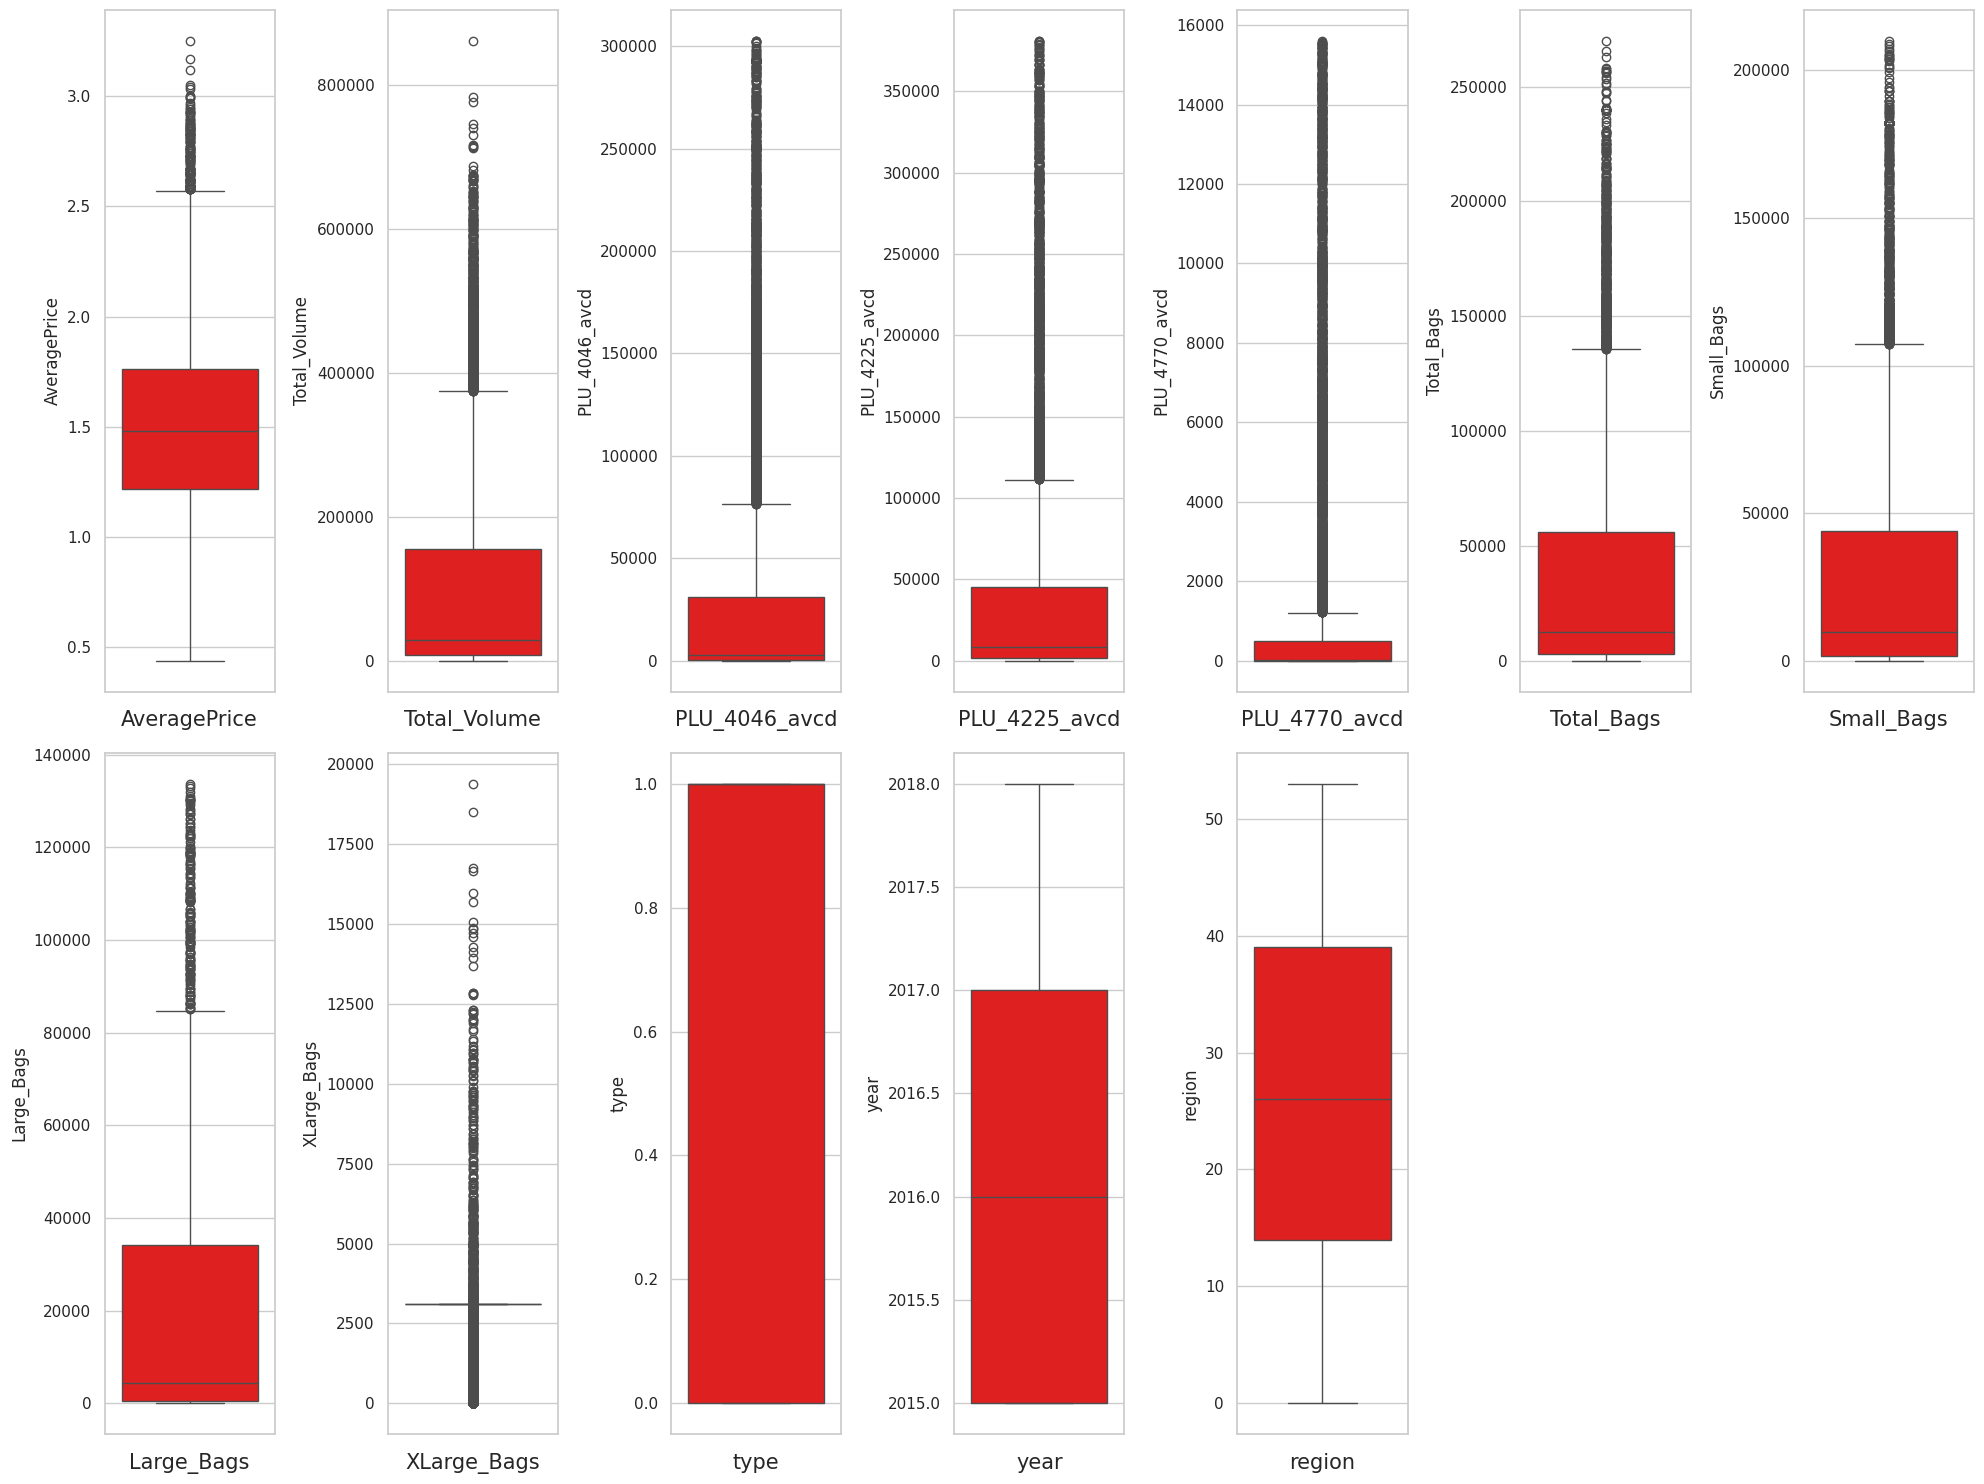

In [ ]:
#Visualize the outliers using boxplot
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber <=13:
        plt.subplot(2,7,plotnumber)
        ax=sns.boxplot(data=df[column],color='red')
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.tight_layout()

In [ ]:
#The data looks much better than before as we removed the skewness
#All outliers are treated
#Now let's check for multicolinearity problem

# **CHECK FOR MULTICOLINEARITY**

# **Correlation Matrix**

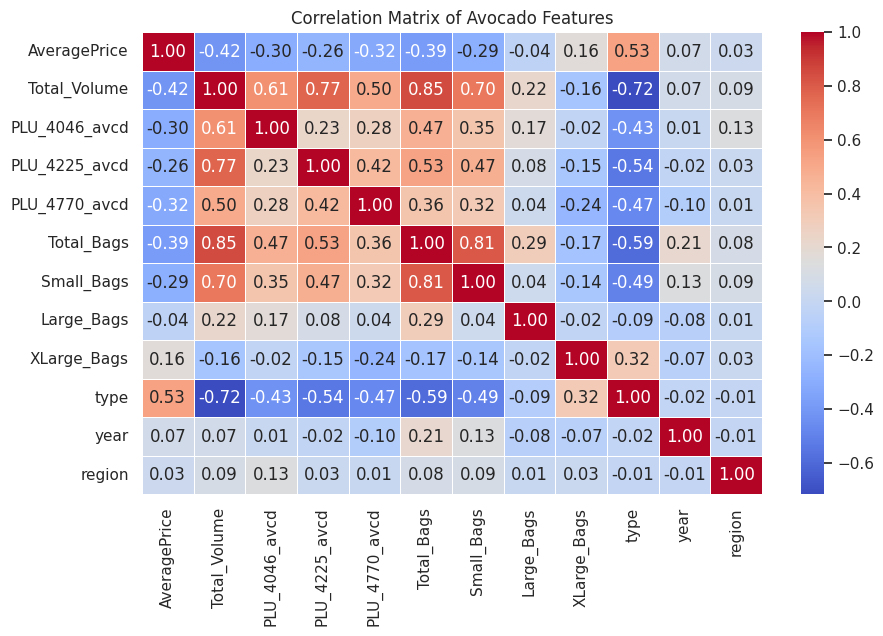

In [ ]:
# Compute correlation
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Avocado Features")
plt.show()

In [ ]:
#total volume and total bags are highly correlated so we can drop any one of them

# **FINDING THE RELATION-SHIP**

In [ ]:
#here our target variable is region

In [ ]:
# Split the dataset for training and testing set
x = df.drop(columns='region', axis=1)
y = df['region']

In [ ]:
x.head()

,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015


In [ ]:
y.head()

,region
0,0
1,0
2,0
3,0
4,0


Before we fit our data to a model lets Visualize the relationship between out independent variables and the categories

Categorical data plotting , when we are plotting stripplot first we have to write label then feature .

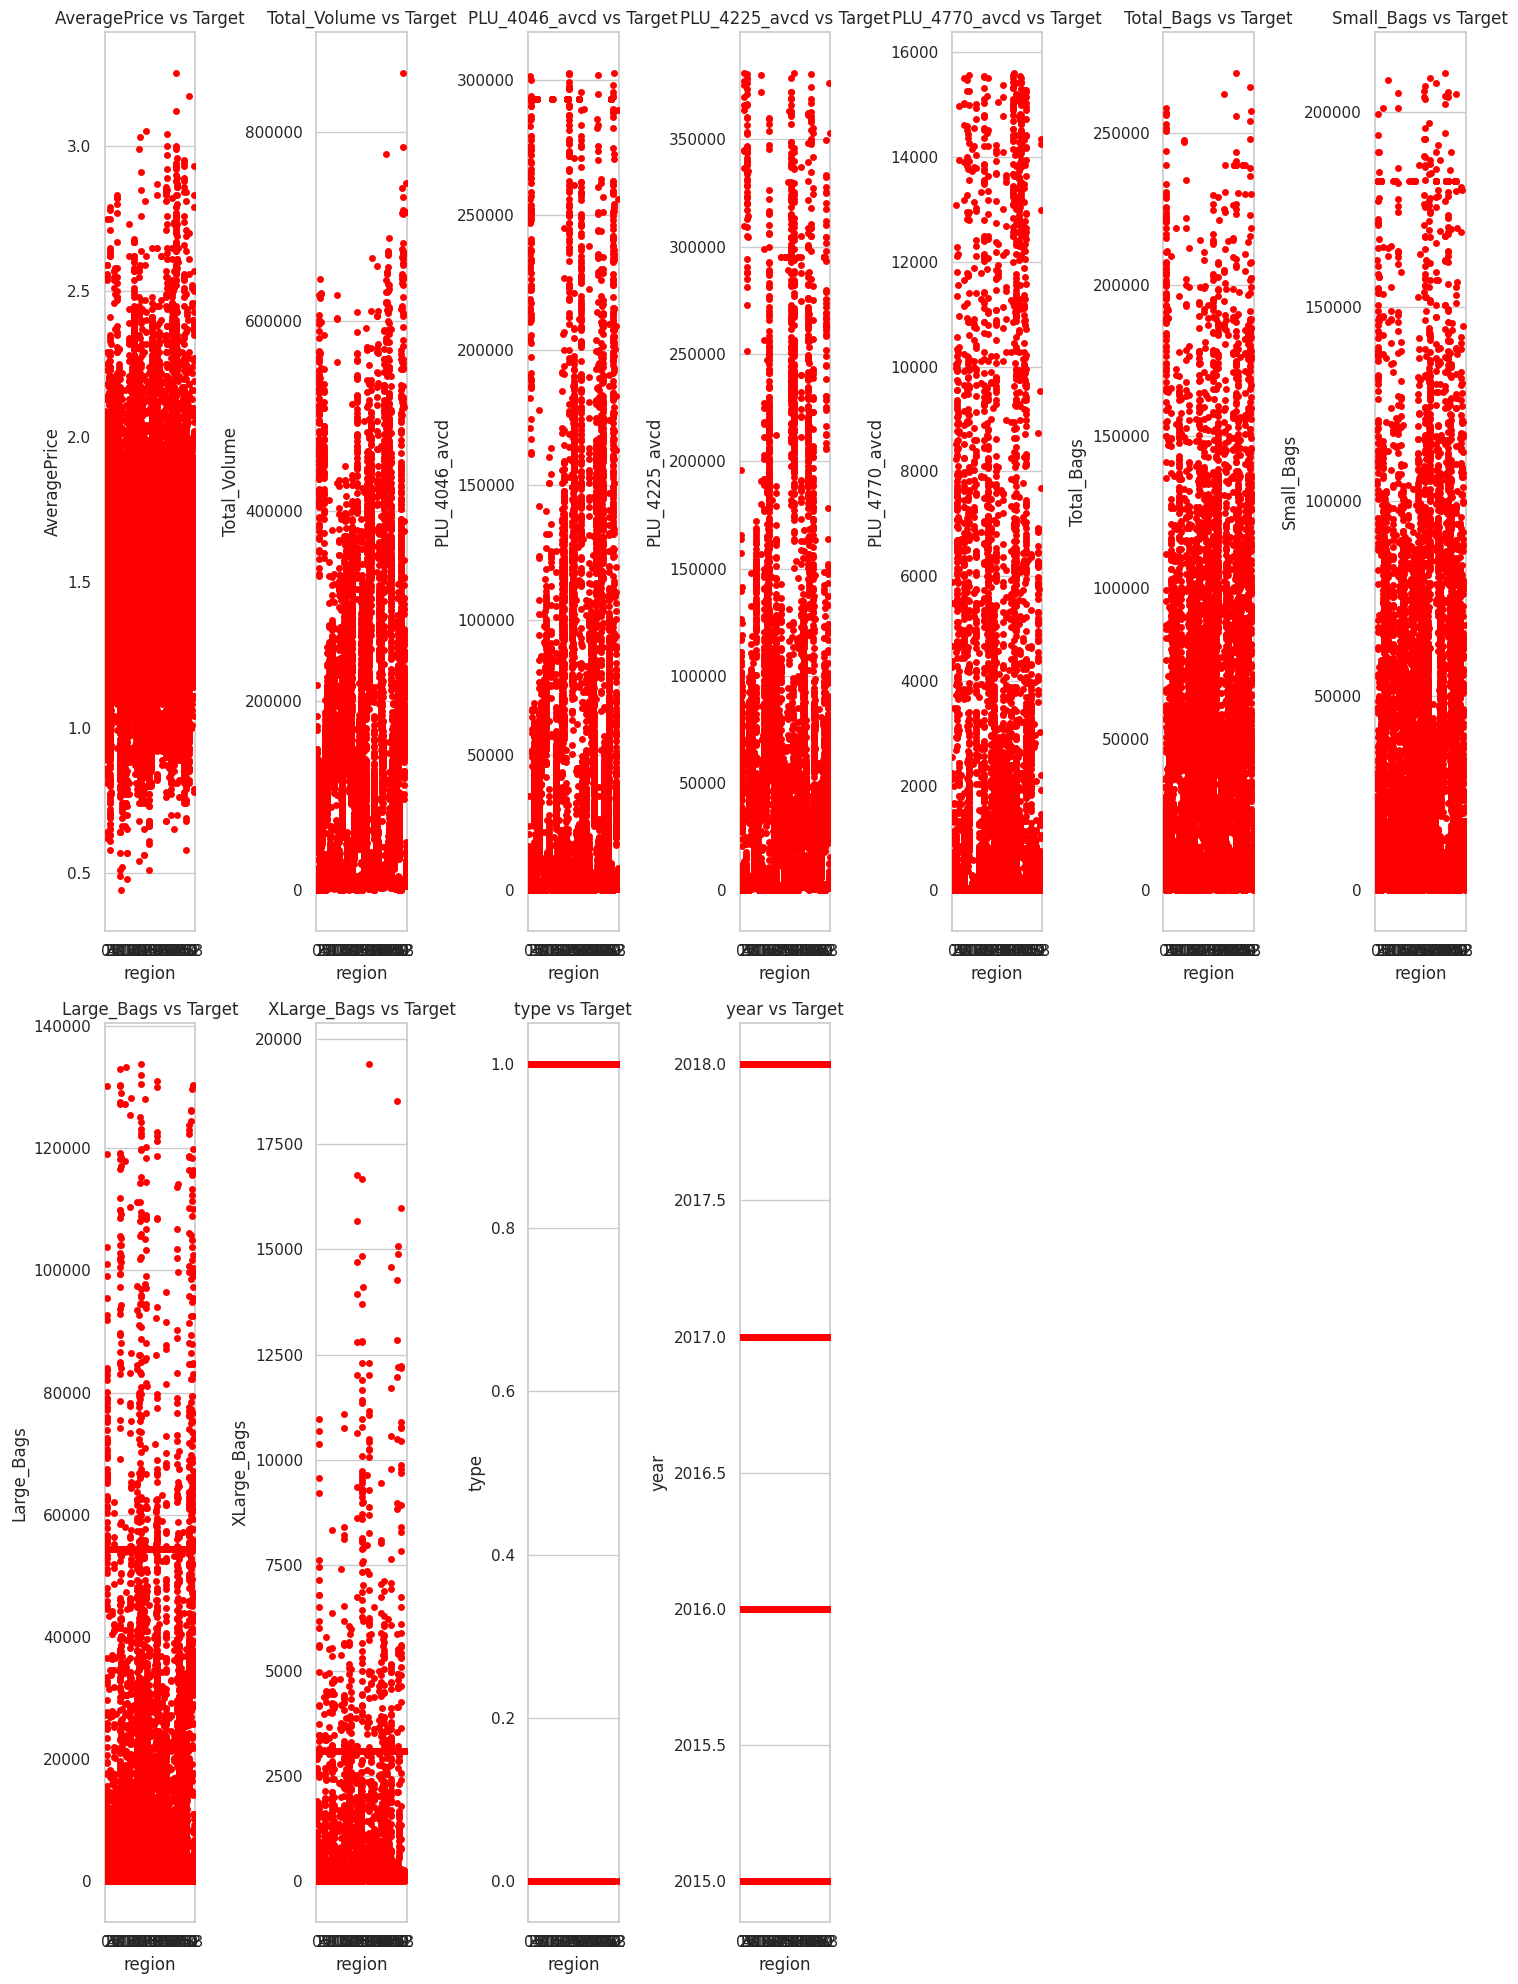

In [ ]:
# Assuming 'x' is the features DataFrame and 'y' is the target class
plt.figure(figsize=(15,20))
plotnumber = 1
for column in x.columns:
    if plotnumber <= 14:
        ax = plt.subplot(2, 7, plotnumber)
        sns.stripplot(x=y, y=x[column], ax=ax,color='red')
        ax.set_title(f'{column} vs Target')
    plotnumber += 1
plt.tight_layout()
plt.show()

Lets Proceed by cheacking multicollinearity in the dependent variables . Before that , we shoul scale the data using some standard scaler.

# **Standardize the data**

In [ ]:
#Now use standard scaler and standardized the data

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [ ]:
x_scaled.shape

(13515, 11)

# **VIF**

It is used to detect multicollinearity. Multicollinearity occurs when two or more independent variables are highly correlated.

In [ ]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]

vif['Features']=x.columns

In [ ]:
#Lets Check the Values

vif

,vif,Features
0,1.479692,AveragePrice
1,16.231867,Total_Volume
2,2.316836,PLU_4046_avcd
3,4.256183,PLU_4225_avcd
4,1.480935,PLU_4770_avcd
5,8.423640,Total_Bags
6,3.378358,Small_Bags
7,1.322000,Large_Bags
8,1.180406,XLarge_Bags
9,2.648836,type


when the VIF are less then 5 and are very low. That means no multicollinearity .if VIF is greater than 5 multicolinearity exist and we have to drop any one of the varaiable.Here  total volume and total bags have multicolinearity greater than 5 so we can drop any one of them
 Now , we can go ahead with fitting our data to the model before that , lets split our data in test and training.

In [ ]:
x=df.drop(['region'],axis=1)

In [ ]:
y=df['region']

In [ ]:
x.head()

,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015


In [ ]:
y.head()

,region
0,0
1,0
2,0
3,0
4,0


# **TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=45)

In [ ]:
# Shape of the training and testing set
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10136, 11)
(10136,)
(3379, 11)
(3379,)


since this is a classification model we have to use classification model algorithms.

# **LOAD MODELS**

In [ ]:
#choose models

def model_predict(model, name):

    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print('='*30)
    print('Model: ', name)
    print('='*30)
    print(f'\n--Train_Score-->{train_score*100:.2f}%')
    print(f'--Test_Score-->{test_score*100:.2f}%')
    print('='*30)

    print('Model Evaluation')
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'\n--MSE:--->{mse:.2f}')
    print(f'--RMSE:--->{rmse:.2f}')
    print(f'--MAE:--->{mae:.2f}')
    print(f'--R-squared:--->{r2:.2f}\n')

    plt.scatter(y_test,y_pred,color='blue',facecolor='red')
    plt.plot(y_test,y_test)
    plt.xlabel('Actual Data')
    plt.ylabel('Predicted Data')
    plt.title(name)
    plt.tight_layout()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:  log_reg

--Train_Score-->40.32%
--Test_Score-->38.80%
Model Evaluation

--MSE:--->302.50
--RMSE:--->17.39
--MAE:--->11.43
--R-squared:--->-0.28



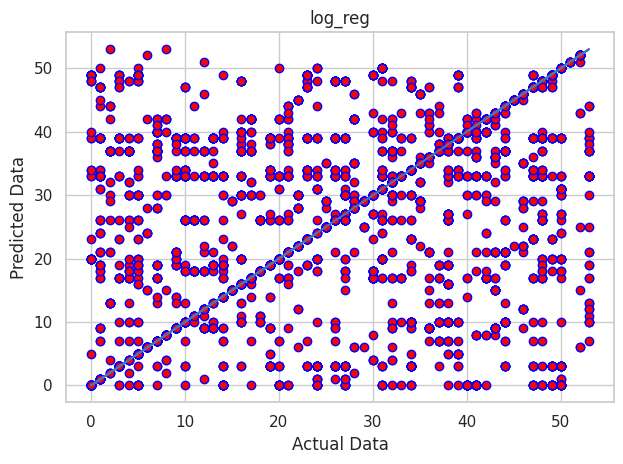

In [ ]:
log_reg=LogisticRegression()
model_predict(log_reg,'log_reg')

Model:  DTC

--Train_Score-->100.00%
--Test_Score-->75.79%
Model Evaluation

--MSE:--->119.05
--RMSE:--->10.91
--MAE:--->4.41
--R-squared:--->0.50



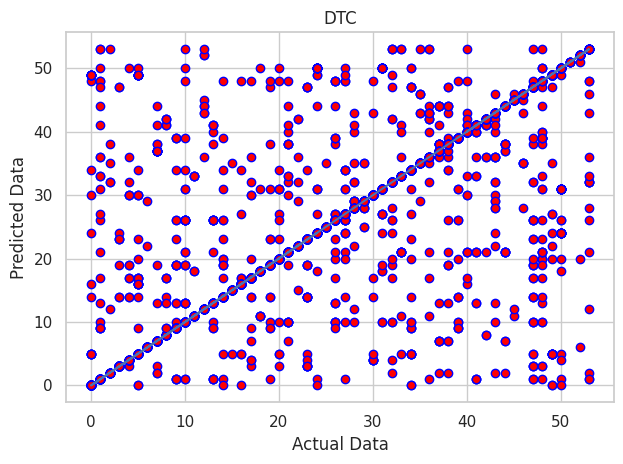

In [ ]:
DTC = DecisionTreeClassifier(random_state=200)

model_predict(DTC,'DTC')

Model:  RFC

--Train_Score-->100.00%
--Test_Score-->88.55%
Model Evaluation

--MSE:--->59.53
--RMSE:--->7.72
--MAE:--->2.20
--R-squared:--->0.75



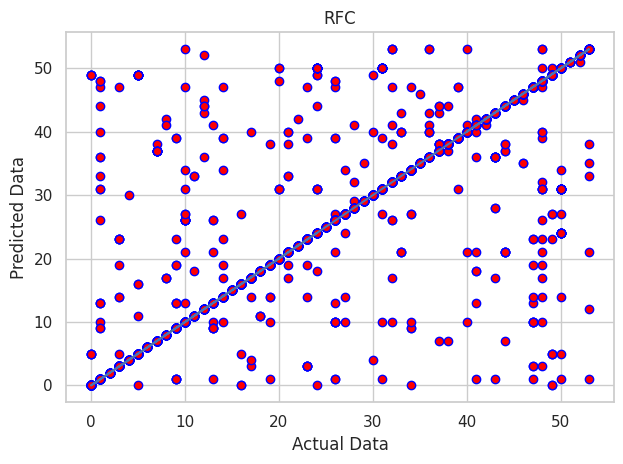

In [ ]:
RFC = RandomForestClassifier(random_state=200)

model_predict(RFC, 'RFC')

In [ ]:
# to check if the models are overfitting or not

def overfit_check(model_check_overfit, reg_model, reg_model_name):
    model_check_overfit.fit(x_train, y_train)
    alpha = model_check_overfit.alpha_
    reg_model_check = reg_model(alpha, random_state=200)
    reg_model_check.fit(x_train, y_train)
    reg_score = reg_model_check.score(x_test, y_test)

    print('='*30)
    print(reg_model_name)
    print('='*30)
    print('Alpha:--->', alpha)
    print('Score:--->', reg_score)

In [ ]:
# to check whether the model is overfit or not

lasso_overfit_check = overfit_check(LassoCV(), Lasso, 'Lasso')
lasso_overfit_check


Lasso
Alpha:---> 0.03026523134722255
Score:---> 0.026931007642493343


In [ ]:
ridge_overfit_check = overfit_check(RidgeCV(), Ridge, 'Ridge')
ridge_overfit_check

Ridge
Alpha:---> 10.0
Score:---> 0.02684079950407492


from the above score we can say that other than logistic model, decision tree classifier and random forest classifier are overfit.

So now the cross validation are applied on Random forest classifier model and Decision tree classifier

In [ ]:
def cross_validation(k_folds, model, model_name,  x, y):
    kf_cv = KFold(n_splits= k_folds, shuffle=True, random_state=200)
    cross_val_results = cross_val_score(model, x, y, cv=kf_cv)

    print('='*30)
    print(model_name)
    print('='*30)
    print('Cross_Validation:')
    print('-'*30)
    # print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
    print(f'Mean Accuracy: {cross_val_results.mean()*100:.2f}')

In [ ]:
logi_reg_cv = cross_validation(k_folds=10, model=log_reg, model_name='log_reg',x=x_scaled, y=y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

log_reg
Cross_Validation:
------------------------------
Mean Accuracy: 39.88


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
RFC_cv = cross_validation(k_folds=10, model=RFC, model_name='RFC', x=x_scaled, y=y)

RFC
Cross_Validation:
------------------------------
Mean Accuracy: 89.30


In [ ]:
DTC_cv = cross_validation(k_folds=10, model=DTC, model_name='DTC', x=x_scaled, y=y)

DTC
Cross_Validation:
------------------------------
Mean Accuracy: 77.48


Did cross_validation on the random forest and decision tree classifier models to check the accuracy score of the models. Upon doing K-Fold CV, the model's mean accuracy is 89.30.96% and 77.48%.

# **HYPER PARAMETER TUNING**

In [ ]:
#Doing hyperparameter tuning on these models

In [ ]:
def hyperparameters_tuning(regressor_model, model_name):

    if regressor_model == RandomForestClassifier():
        grid_param = {
            'n_estimators': [50,100,150],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'log_loss', 'entropy'],  # Changed the criterion values
            'max_features': ['sqrt', 'log2', None]
        }
    else:

        grid_param = {
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'log_loss', 'entropy'], # Changed the criterion values
            'max_features':['sqrt', 'log2']
        }

    random_search = RandomizedSearchCV(estimator=regressor_model, param_distributions=grid_param, n_iter=100, cv=5)
    random_search.fit(x_train, y_train)
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(x_test)

    train_score = best_model.score(x_train, y_train)
    test_score = best_model.score(x_test, y_test)

    pred_r2_score = r2_score(y_true=y_test, y_pred=y_pred)

    print('='*30)
    print('Hyperparameters Tuning Results')
    print('='*30)
    print(model_name)
    print('-'*30)
    print(f'Best Hyperparameters:--->{random_search.best_params_}')
    print(f'Best Score:--->{random_search.best_score_}/n')
    print(f'Train Score:--->{train_score*100}')
    print(f'Test Score:--->{test_score*100}')
    print(f'Pred_R2_Score:--->{pred_r2_score*100}')

    plt.scatter(y_test, y_pred, c='b', marker='o', edgecolors='k', alpha=0.5)
    plt.plot(y_test,y_test)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')


    return best_model

Hyperparameters Tuning Results
DTC
------------------------------
Best Hyperparameters:--->{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy'}
Best Score:--->0.693567557889595/n
Train Score:--->99.93093922651933
Test Score:--->69.84314886060965
Pred_R2_Score:--->40.812780272144046


DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       random_state=200)

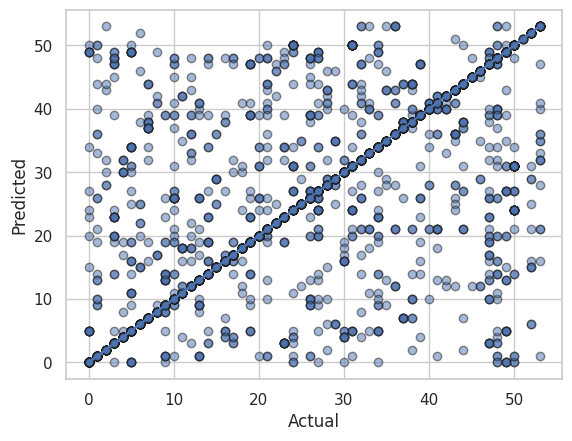

In [ ]:
dt_hyper_tune = hyperparameters_tuning(DTC, 'DTC')
dt_hyper_tune

In [ ]:
#here we got decision tree classifier is the best

# **CLASSIFICATION REPORT**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

def metrics_score(RFC,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred=RFC.predict(X_train)
        print("==================Training Score=================")
        print("Accuracy Score == >  ", accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=RFC.predict(X_test)
        print("=================Test Score======================")
        print("Accuracy Score==>  ",accuracy_score(y_test,pred)*100)
        print("Classification Report",classification_report(y_test,pred))


In [ ]:
#checking train and test score
metrics_score(RFC,x_train,x_test,y_train,y_test,train=True)
metrics_score(RFC,x_train,x_test,y_train,y_test,train=False)

==================Training Score=================
Accuracy Score == >   100.0
=================Test Score======================
Accuracy Score==>   88.54690736904409
Classification Report               precision    recall  f1-score   support

           0       0.92      0.91      0.92        89
           1       0.79      0.76      0.77        70
           2       1.00      1.00      1.00        31
           3       0.89      0.89      0.89        82
           4       0.96      0.98      0.97        48
           5       0.88      0.85      0.87        87
           6       1.00      1.00      1.00        50
           7       0.96      0.87      0.91        77
           8       1.00      0.87      0.93        38
           9       0.89      0.84      0.86        75
          10       0.77      0.80      0.78        79
          11       0.91      0.93      0.92        42
          12       0.97      0.86      0.91        42
          13       0.81      0.81      0.81        53
 

In [ ]:
#so we can conclude that RFC is more accuarate thn the others .so we can choose rfc for predicting the region

# **SAVE THE MODEL**

In [ ]:
#Saving the model to the local file system
with open('avocado.pkl', 'wb') as file:
    pickle.dump(RFC, file)

In [ ]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Assuming you want to save the LabelEncoders you used earlier:
encoder_type = LabelEncoder()
encoder_region = LabelEncoder()



# Save encoders
with open("encoders.pkl", "wb") as f:
    pickle.dump({"type": encoder_type, "region": encoder_region}, f)